In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Importing and preparing the dataset

In [2]:
#dataset can be downloaded in : https://www.kaggle.com/c/titanic/data
titanic = pd.read_csv('titanic_train.csv')

In [3]:
titanic.drop(['Name','Ticket','Cabin'],axis = 1,inplace=True)
titanic = titanic[['PassengerId',  'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare','Embarked','Survived']]

In [4]:
titanic.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,male,22.0,1,0,7.2500,S,0
1,2,1,female,38.0,1,0,71.2833,C,1
2,3,3,female,26.0,0,0,7.9250,S,1
3,4,1,female,35.0,1,0,53.1000,S,1
4,5,3,male,35.0,0,0,8.0500,S,0


In [5]:
titanic.isna().sum()

PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Survived         0
dtype: int64

In [6]:
age_mean_class1_titanic = round(titanic[titanic['Pclass'] == 1]['Age'].mean())
age_mean_class2_titanic = round(titanic[titanic['Pclass'] == 2]['Age'].mean())
age_mean_class3_titanic= round(titanic[titanic['Pclass'] == 3]['Age'].mean())

print(age_mean_class1_titanic)
print(age_mean_class2_titanic)
print(age_mean_class3_titanic)

38
30
25


In [7]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return age_mean_class1_titanic

        elif Pclass == 2:
            return age_mean_class2_titanic

        else:
            return age_mean_class3_titanic

    else:
        return Age

In [8]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)
titanic.dropna(inplace = True,subset=['Embarked'])

In [9]:
titanic.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,male,22.0,1,0,7.2500,S,0
1,2,1,female,38.0,1,0,71.2833,C,1
2,3,3,female,26.0,0,0,7.9250,S,1
3,4,1,female,35.0,1,0,53.1000,S,1
4,5,3,male,35.0,0,0,8.0500,S,0


In [10]:
#one-hot encoding on titanic dataset
sex = pd.get_dummies(titanic['Sex'],drop_first=True)  # drop_first=True > Para evitar a multi-colinaridade
embark = pd.get_dummies(titanic['Embarked'],drop_first=True)
pclass = pd.get_dummies(titanic['Pclass'],drop_first=True)
titanic.drop(['Sex','Embarked','Pclass'],axis=1,inplace=True)

In [11]:
titanic = pd.concat([titanic,sex,embark,pclass],axis=1)

In [12]:
titanic.head()

,PassengerId,Age,SibSp,Parch,Fare,Survived,male,Q,S,2,3
0,1,22.0,1,0,7.2500,0,1,0,1,0,1
1,2,38.0,1,0,71.2833,1,0,0,0,0,0
2,3,26.0,0,0,7.9250,1,0,0,1,0,1
3,4,35.0,1,0,53.1000,1,0,0,1,0,0
4,5,35.0,0,0,8.0500,0,1,0,1,0,1


In [13]:
titanic = titanic[['PassengerId',2,3, 'male', 'Age', 'SibSp', 'Parch',
       'Fare','Q','S','Survived']]
titanic.head()

,PassengerId,2,3,male,Age,SibSp,Parch,Fare,Q,S,Survived
0,1,0,1,1,22.0,1,0,7.2500,0,1,0
1,2,0,0,0,38.0,1,0,71.2833,0,0,1
2,3,0,1,0,26.0,0,0,7.9250,0,1,1
3,4,0,0,0,35.0,1,0,53.1000,0,1,1
4,5,0,1,1,35.0,0,0,8.0500,0,1,0


In [14]:
titanic.isna().sum()

PassengerId    0
2              0
3              0
male           0
Age            0
SibSp          0
Parch          0
Fare           0
Q              0
S              0
Survived       0
dtype: int64

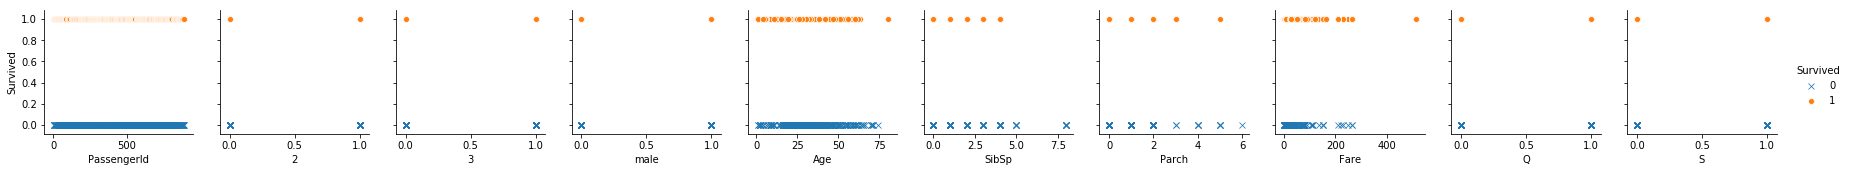

In [15]:
sns.pairplot(titanic,hue = "Survived",x_vars=['PassengerId',2,3, 'male', 'Age', 'SibSp', 'Parch', 'Fare','Q','S'],y_vars=['Survived'],markers=['x','o'])

In [16]:
#dict to receive the models name and score
model_scores = {}

It looks like that we can actually predict if a passenger  survived or dead using that parameters.

# Splitting the train and test data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(titanic.drop(['Survived'],axis=1), 
                                                    titanic['Survived'], test_size=0.30, 
                                                    random_state=101)

## Normalized data 

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
scaler.fit(titanic.drop(['Survived'],axis=1))

/home/raphael/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
scaled_features = scaler.transform(titanic.drop(['Survived'],axis=1))

/home/raphael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [23]:
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(scaled_features,titanic['Survived'],
                                                    test_size=0.30)

# -Logistic Regression Model

In [24]:
from sklearn.linear_model import LogisticRegression


In [25]:
logReg_model = LogisticRegression()
logReg_model.fit(X_train,y_train)

/home/raphael/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
logReg_predictions = logReg_model.predict(X_test)

In [27]:
print('Logistic Regression Model Score: ',logReg_model.score(X_test,y_test))
model_scores['Logistic Regression'] = logReg_model.score(X_test,y_test)

Logistic Regression Model Score:  0.8277153558052435


# -KNN Model

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
knn_model = KNeighborsClassifier(n_neighbors=1)

In [30]:
knn_model.fit(X_train_scaled,y_train_scaled)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [31]:
knn_predictions = knn_model.predict(X_test_scaled)

In [32]:
print('KNN Model Score: ',knn_model.score(X_test_scaled,y_test_scaled))
model_scores['KNN'] = knn_model.score(X_test_scaled,y_test_scaled)

KNN Model Score:  0.7640449438202247


## Finidng a better k value

In [33]:
accuracy = []

# can take some time
for i in range(1,40):
    
    knn_model = KNeighborsClassifier(n_neighbors=i)
    knn_model.fit(X_train_scaled,y_train_scaled)
    accuracy.append(knn_model.score(X_test_scaled,y_test_scaled))

Text(0, 0.5, 'Accuracy')

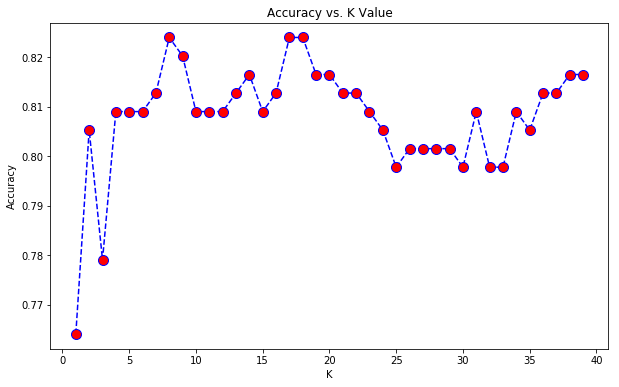

In [34]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

In [35]:
k = accuracy.index(max(accuracy)) #k value with the best accuracy
k +=1 #error rate starts in 0 and k in 1
k

8

### Training with the best k value

In [36]:
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_scaled,y_train_scaled)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [37]:
knnOptmized_predictions = knn_model.predict(X_test_scaled)

In [38]:
print('KNN Model Score(with optimized k value): ',knn_model.score(X_test_scaled,y_test_scaled))
model_scores['KNN Optimized'] = knn_model.score(X_test_scaled,y_test_scaled)

KNN Model Score(with optimized k value):  0.8239700374531835


# Decision Tree Model

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dtree_model = DecisionTreeClassifier()

In [41]:
dtree_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
dtree_predictions = dtree_model.predict(X_test)

In [43]:
print('Decision Tree Model score: ',dtree_model.score(X_test,y_test))
model_scores['Decision tree'] = dtree_model.score(X_test,y_test)

Decision Tree Model score:  0.7528089887640449


## Random Forest variation

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
rfc_model = RandomForestClassifier(n_estimators=100)

In [46]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
rfc_predictions = rfc_model.predict(X_test)

In [48]:
print('Random Forest Model score: ',rfc_model.score(X_test,y_test))
model_scores['Random Forest'] = rfc_model.score(X_test,y_test)

Random Forest Model score:  0.8389513108614233


# SVC and SVM Model

## SVC

In [49]:
from sklearn.svm import SVC

In [50]:
svc_model = SVC()

In [51]:
svc_model.fit(X_train_scaled,y_train_scaled)

/home/raphael/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [52]:
svc_predictions = svc_model.predict(X_test_scaled)

In [53]:
print('SVC Model score: ',svc_model.score(X_test_scaled,y_test_scaled))
model_scores['SVC'] = svc_model.score(X_test_scaled,y_test_scaled)

SVC Model score:  0.8352059925093633


## GridSearch

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [56]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2,n_jobs=2,cv = 3)

In [57]:
grid.fit(X_train_scaled,y_train_scaled)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 144 out of 144 | elapsed:   12.3s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'poly', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [58]:
grid_predictions = grid.predict(X_test_scaled)

In [59]:
print('Grid  best parameters: ',grid.best_estimator_)

Grid  best parameters:  SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [60]:
print('Grid best score: ',grid.score(X_test_scaled,y_test_scaled))
model_scores['SVC with gridSearch'] = grid.score(X_test_scaled,y_test_scaled)

Grid best score:  0.8539325842696629


In [61]:
model_scores

{'Logistic Regression': 0.8277153558052435,
 'KNN': 0.7640449438202247,
 'KNN Optimized': 0.8239700374531835,
 'Decision tree': 0.7528089887640449,
 'Random Forest': 0.8389513108614233,
 'SVC': 0.8352059925093633,
 'SVC with gridSearch': 0.8539325842696629}

In [62]:
v=list(model_scores.values())
keys=list(model_scores.keys())
highestScore = (keys[v.index(max(v))] , max(v))

# K Fold Cross Validation

Now i'll use k fold cross validation to see if the model scores can be improved by using different train/test splits.

In [63]:
from sklearn.model_selection import cross_val_score

In [64]:
logReg_kfoldScore = cross_val_score(logReg_model,titanic.drop('Survived',axis =1),titanic['Survived'],cv = 10)

/home/raphael/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/raphael/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/raphael/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/raphael/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/raphael/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to '

In [65]:
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_kfoldScore = cross_val_score(knn_model,scaled_features,titanic['Survived'],cv = 10)

In [66]:
dtree_kfoldScore = cross_val_score(dtree_model,titanic.drop('Survived',axis =1),titanic['Survived'],cv = 10)

In [67]:
rfc_kfoldScore = cross_val_score(rfc_model,titanic.drop('Survived',axis =1),titanic['Survived'],cv = 10)

In [68]:
svc_kfoldScore = cross_val_score(svc_model,scaled_features,titanic['Survived'],cv = 10)

/home/raphael/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raphael/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raphael/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/raphael/anaconda3/lib/python3.7/site-packages/

In [69]:
grid_kfoldScore = cross_val_score(grid,scaled_features,titanic['Survived'],cv = 10)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=2)]: Done 144 out of 144 | elapsed:   33.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=2)]: Done 144 out of 144 | elapsed:   43.5s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=2)]: Done 144 out of 144 | elapsed:   25.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=2)]: Done 144 out of 144 | elapsed:   28.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=2)]: Done 144 out of 144 | elapsed:   27.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=2)]: Done 144 out of 144 | elapsed:   19.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=2)]: Done 144 out of 144 | elapsed:   22.9s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=2)]: Done 144 out of 144 | elapsed:   15.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=2)]: Done 144 out of 144 | elapsed:   30.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=2)]: Done 144 out of 144 | elapsed:   24.0s finished


In [70]:
kfold_scores = {}
kfold_scores['logreg'] = (logReg_kfoldScore.mean())
kfold_scores['knn'] = (knn_kfoldScore.mean())
kfold_scores['dtree'] = (dtree_kfoldScore.mean())
kfold_scores['rfc'] = (rfc_kfoldScore.mean())
kfold_scores['svc'] = (svc_kfoldScore.mean())
kfold_scores['grid'] = (grid_kfoldScore.mean())

In [71]:
print('Max scores using k fold cross validation:)
print('logistic regression:\n ',logReg_kfoldScore.max())
print('knn:\n ',knn_kfoldScore.max())
print('decision tree:\n ',dtree_kfoldScore.max())
print('random forest:\n ',rfc_kfoldScore.max())
print('svc:\n ',svc_kfoldScore.max())
print('GridSearch:\n ',grid_kfoldScore.max())

logistic regression:
  0.8764044943820225
knn:
  0.8539325842696629
decision tree:
  0.8089887640449438
random forest:
  0.898876404494382
svc:
  0.8651685393258427
GridSearch:
  0.8764044943820225


In [72]:
#average scores using k fold
kfold_scores

{'logreg': 0.8065372829417774,
 'knn': 0.8132660878447396,
 'dtree': 0.7345888661899898,
 'rfc': 0.8188712972420837,
 'svc': 0.8200459652706844,
 'grid': 0.815526046986721}

In [73]:
v_kfold = list(kfold_scores.values())
keys_kfold=list(kfold_scores.keys())
highestScore_kfold = (keys_kfold[v_kfold.index(max(v_kfold))] , max(v_kfold))

In [74]:
print("Highest model score: ", highestScore)
print("Highest model score with kfold cross validation(average) : ", highestScore_kfold)

Highest model score:  ('SVC with gridSearch', 0.8539325842696629)
Highest model score with kfold cross validation(average) :  ('svc', 0.8200459652706844)
